In [ ]:
import numpy as np  # linear algebra
import pandas as pd  # read and wrangle dataframes
import matplotlib.pyplot as plt # visualization
import seaborn as sns # statistical visualizations and aesthetics
from sklearn.base import TransformerMixin # To create new classes for transformations
from sklearn.preprocessing import (FunctionTransformer, StandardScaler) # preprocessing
from sklearn.decomposition import PCA # dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import boxcox # data transform
from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold,
                                     cross_val_score, GridSearchCV,
                                     learning_curve, validation_curve) # model selection modules
from sklearn.pipeline import Pipeline # streaming pipelines
from sklearn.base import BaseEstimator, TransformerMixin # To create a box-cox transformation class
from collections import Counter
import warnings
# load models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import (XGBClassifier, plot_importance)
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from time import time

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [ ]:
df=pd.read_csv('/content/glass (2).csv')

In [ ]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head(15)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [ ]:
df.dtypes

,0
RI,float64
Na,float64
Mg,float64
Al,float64
Si,float64
K,float64
Ca,float64
Ba,float64
Fe,float64
Type,int64


In [ ]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7])

In [ ]:
df['Type'].value_counts()

,count
Type,
2,76
1,70
7,29
3,17
5,13
6,9


In [ ]:
df.shape

(214, 10)

In [ ]:
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [ ]:
df.nunique()

,0
RI,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32
Type,6


In [ ]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [ ]:
features = df.columns[:-1].tolist()

In [ ]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [ ]:
for f in features:
  df[f] = (df[f]-df[f].min())/(df[f].max()-df[f].min())

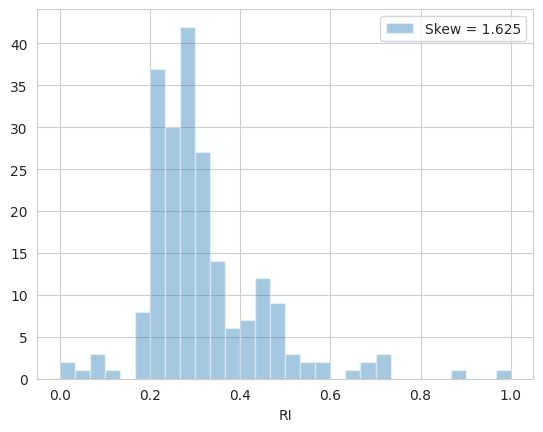

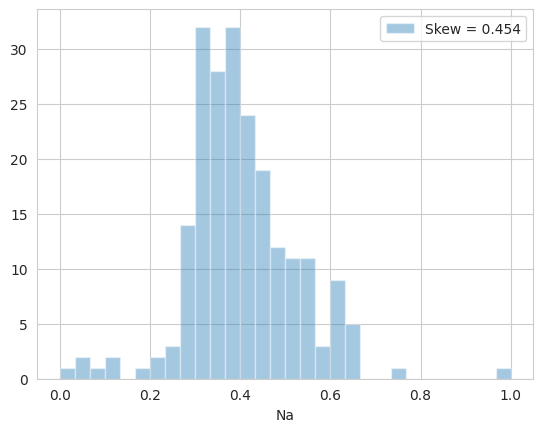

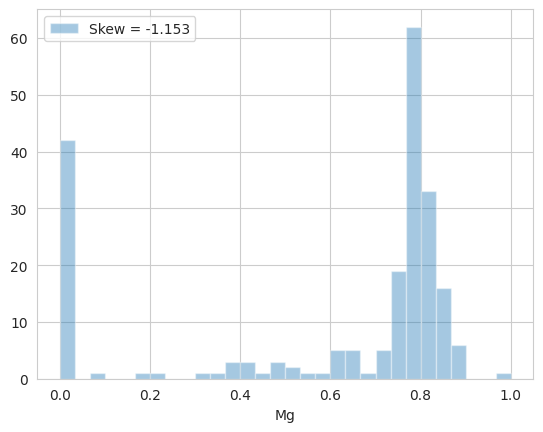

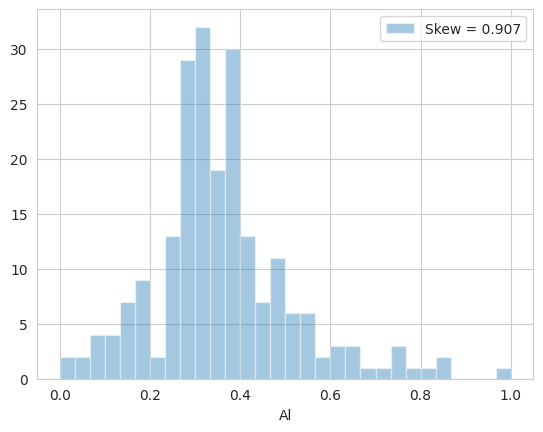

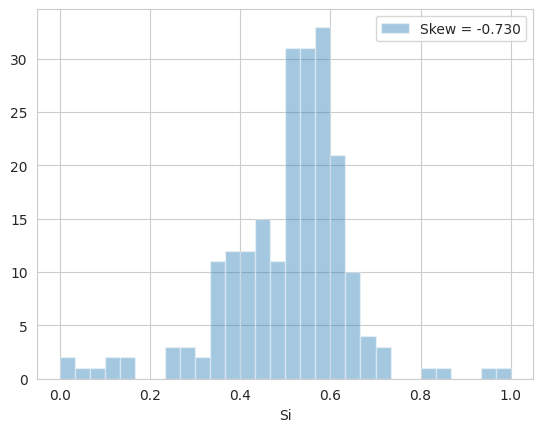

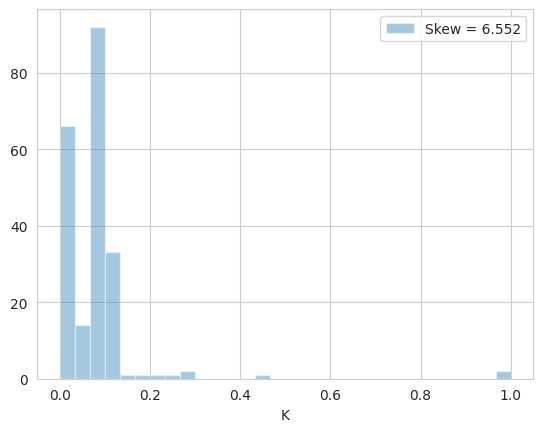

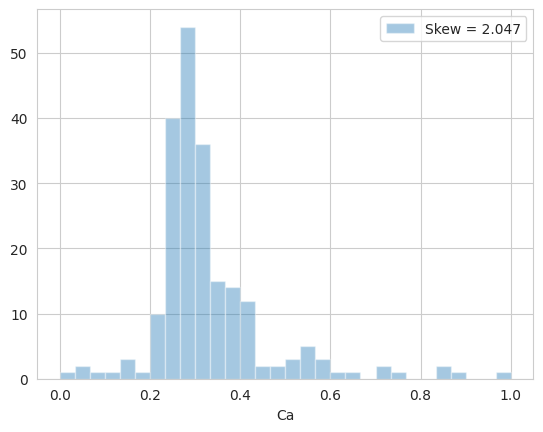

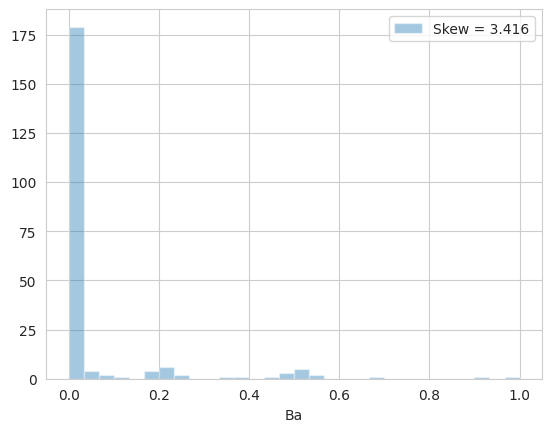

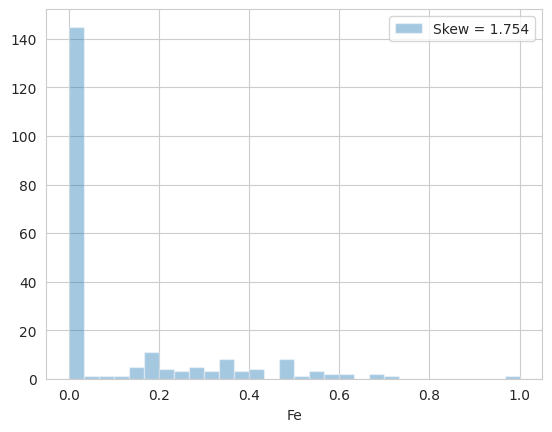

In [ ]:
for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [ ]:
def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers.
    """
    outlier_indices = []

    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)

        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)

        # Interquartile rrange (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )

    return multiple_outliers

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[features]))))

The dataset contains 14 observations with more than 2 outliers


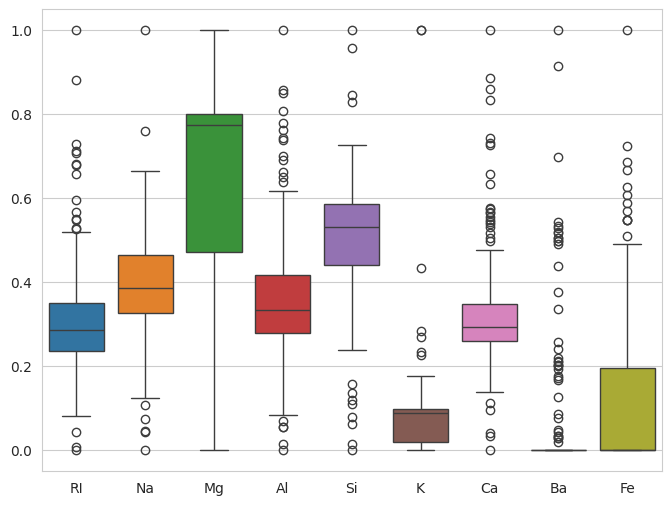

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(df[features])
plt.show()

<Figure size 800x800 with 0 Axes>

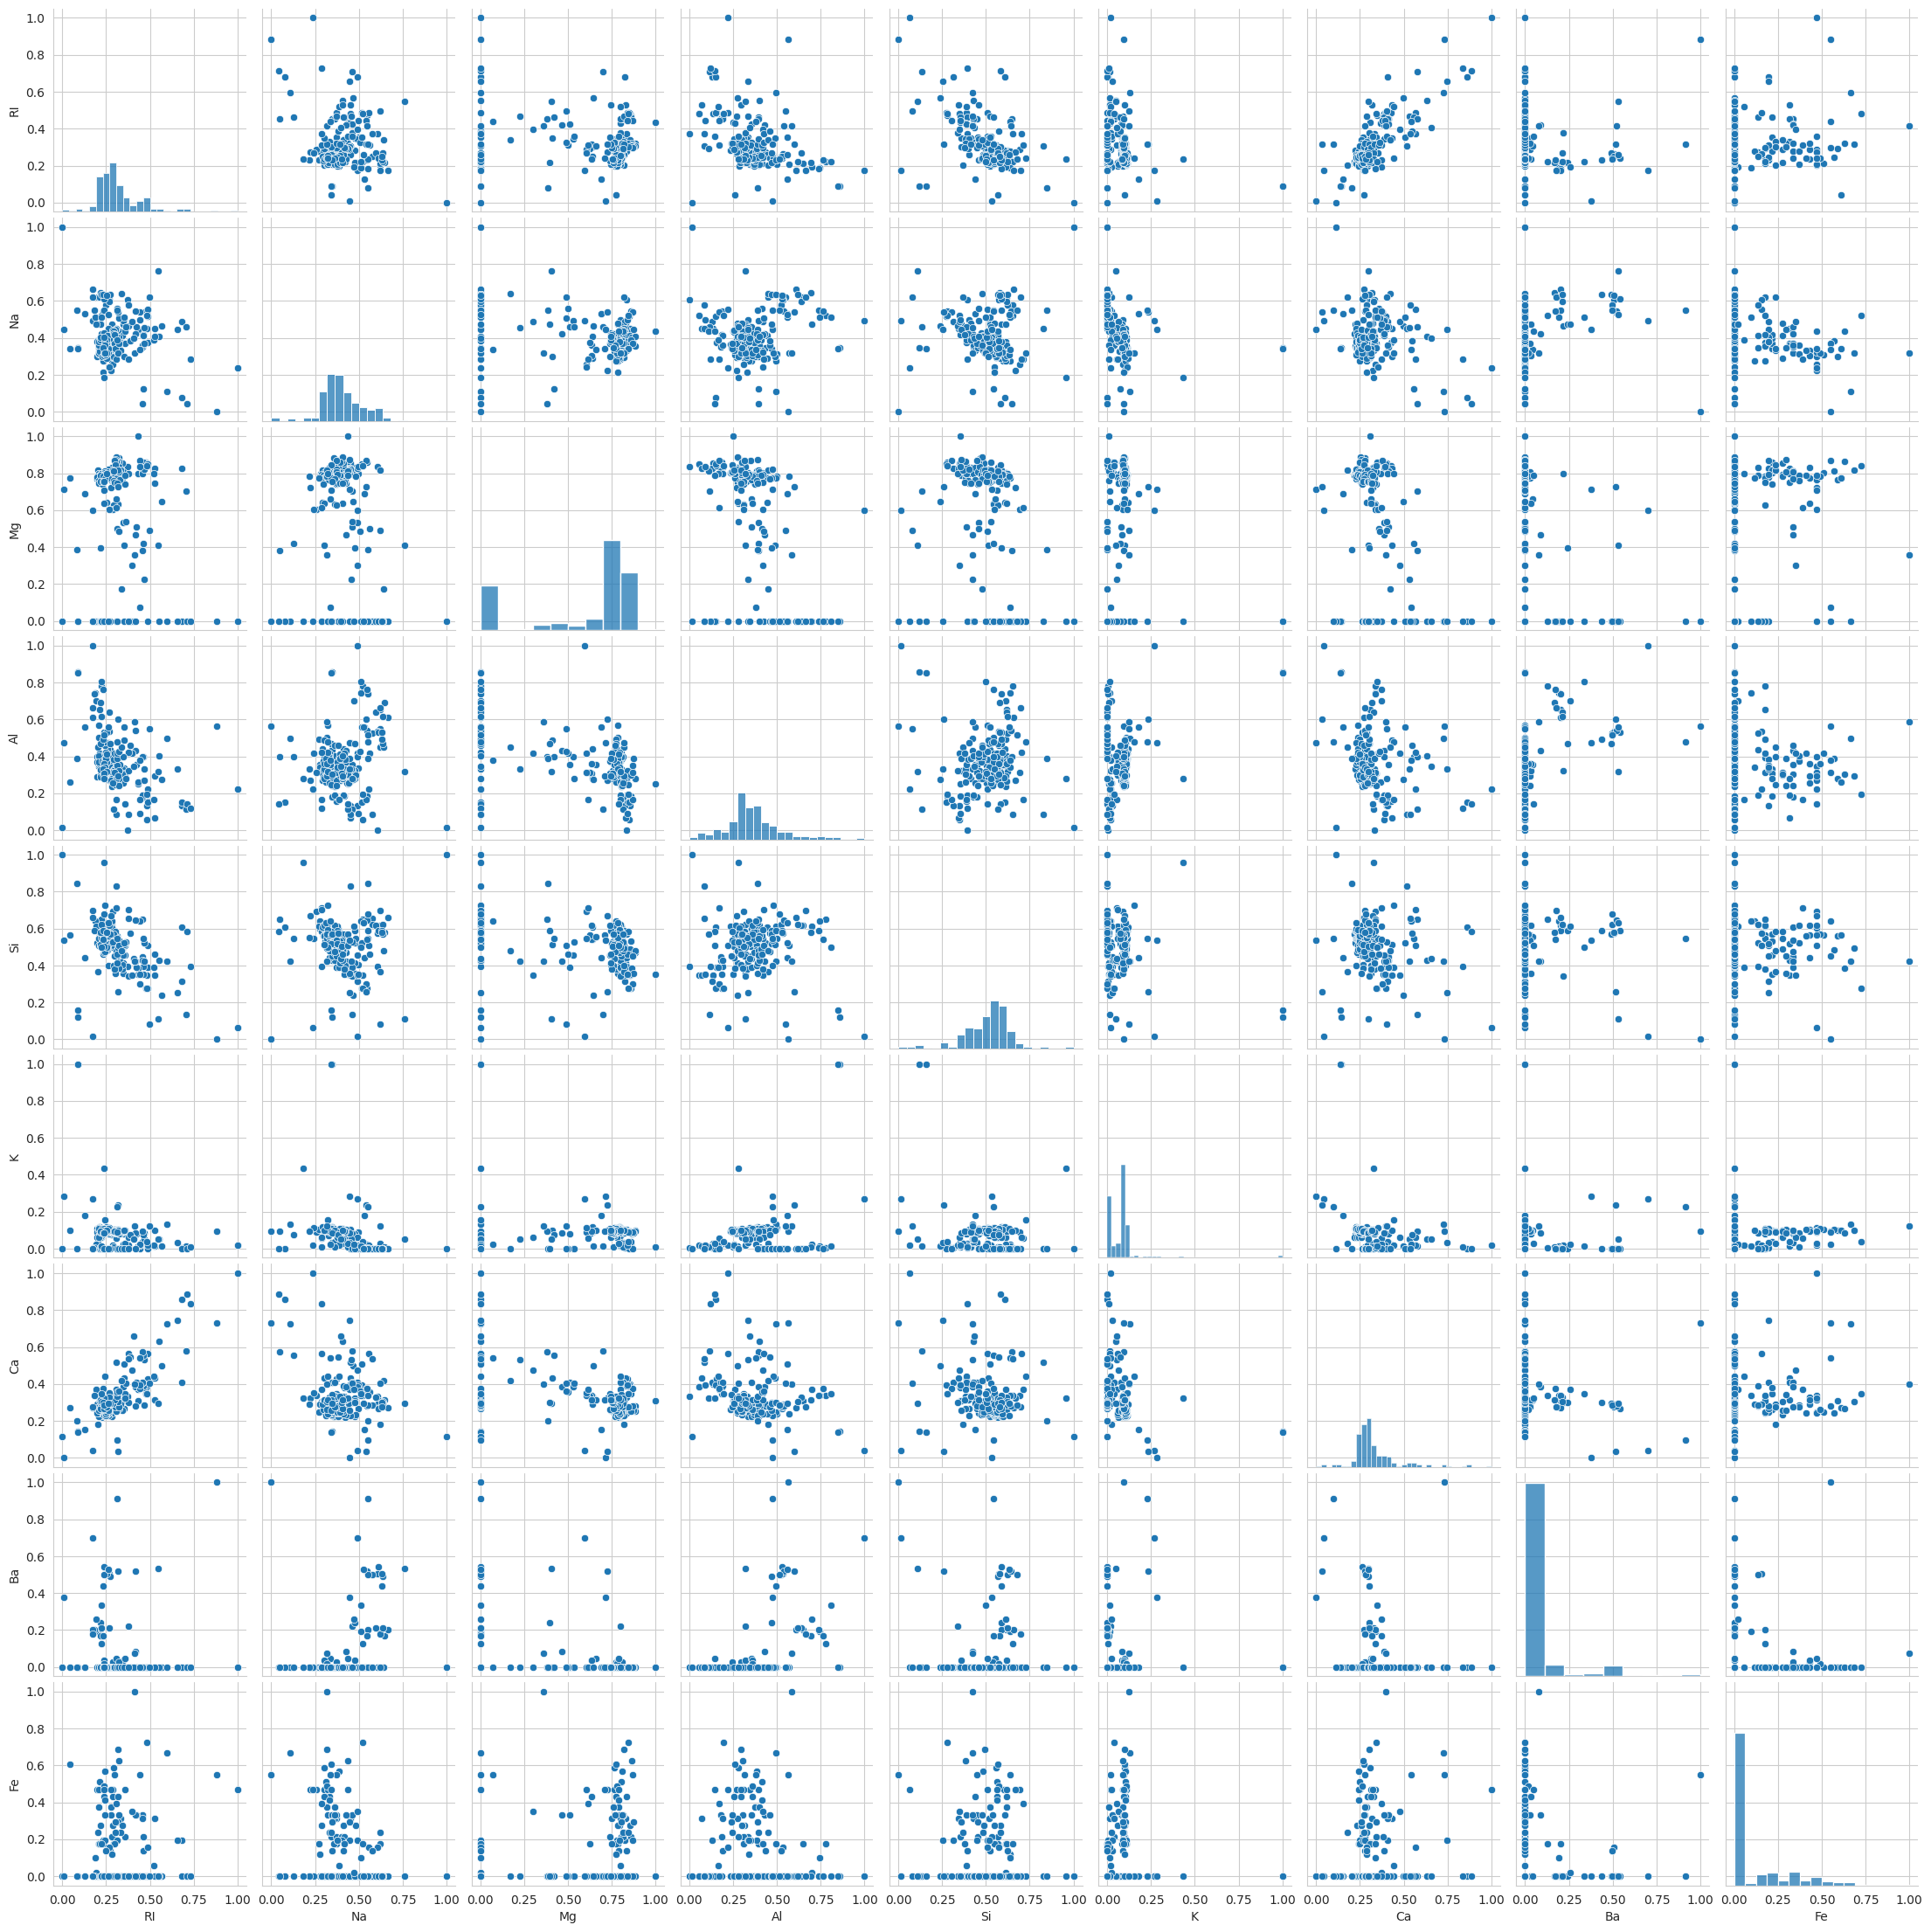

In [ ]:
plt.figure(figsize=(8,8))
sns.pairplot(df[features],palette='coolwarm')
plt.show()

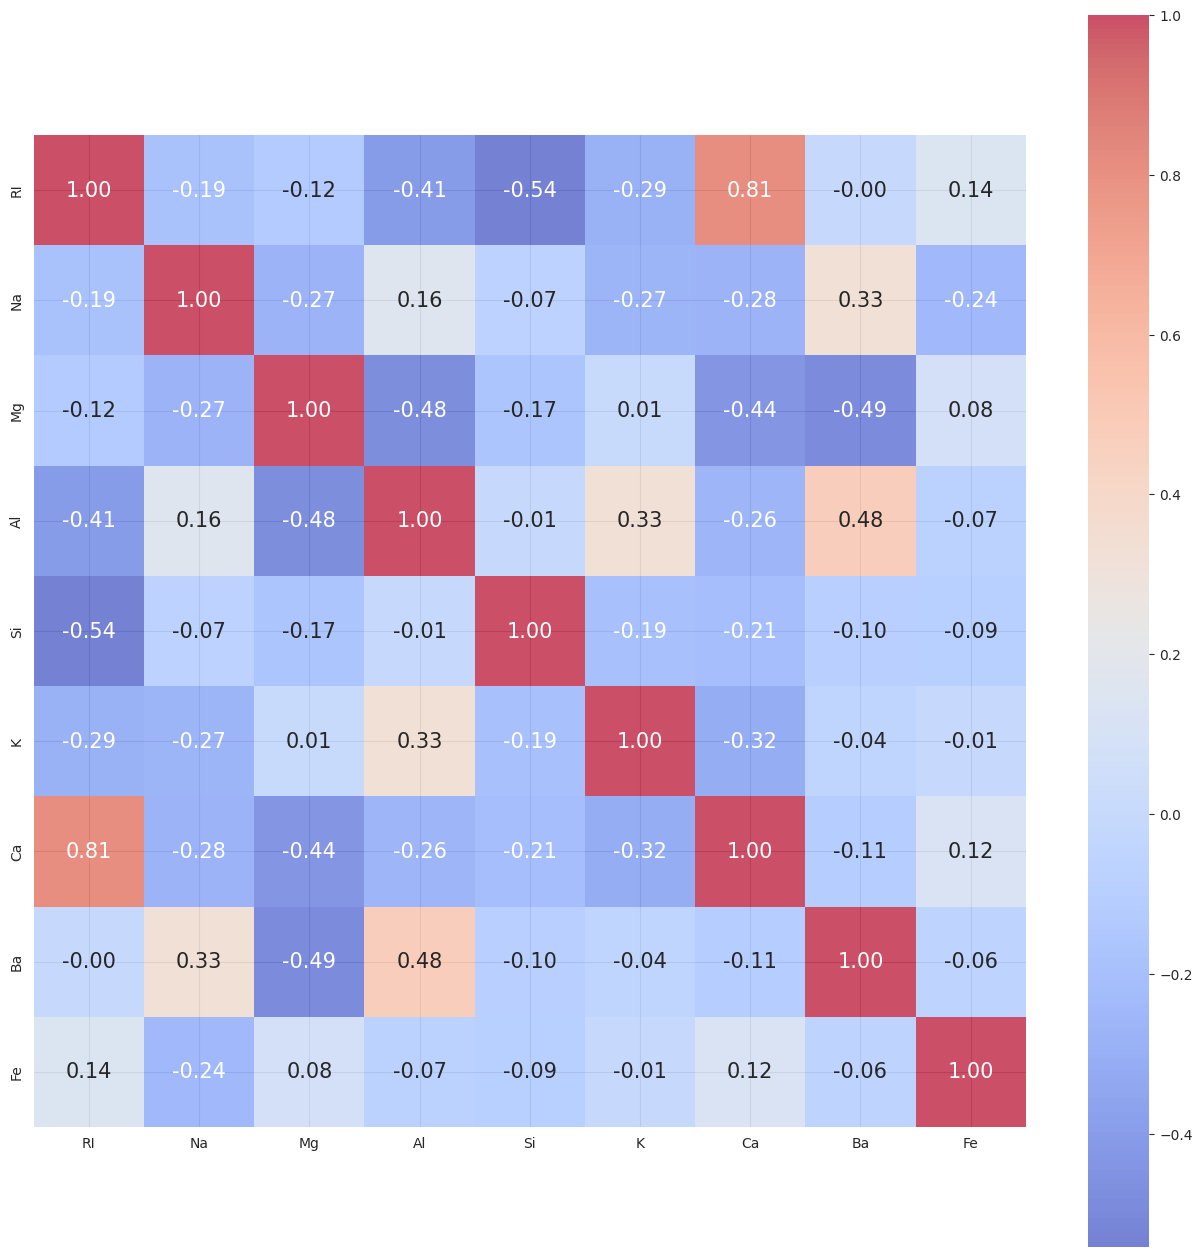

In [ ]:
corr = df[features].corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features, yticklabels= features, alpha = 0.7,   cmap= 'coolwarm')
plt.show()

In [ ]:
outlier_indices = outlier_hunt(df[features])
df = df.drop(outlier_indices).reset_index(drop=True)
print(df.shape)

(200, 10)


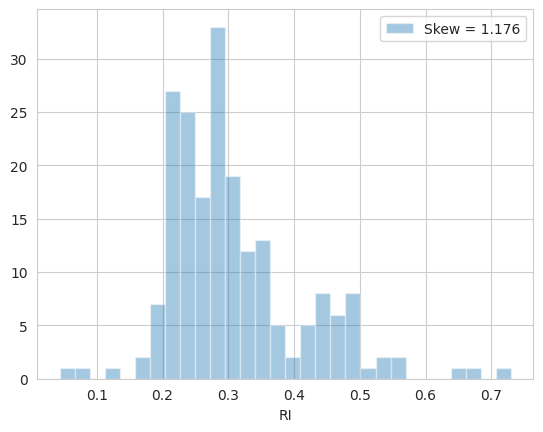

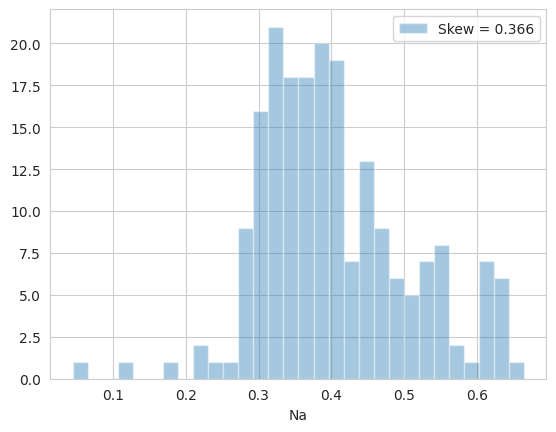

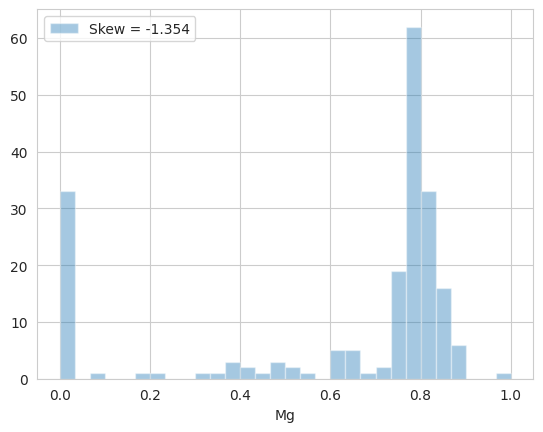

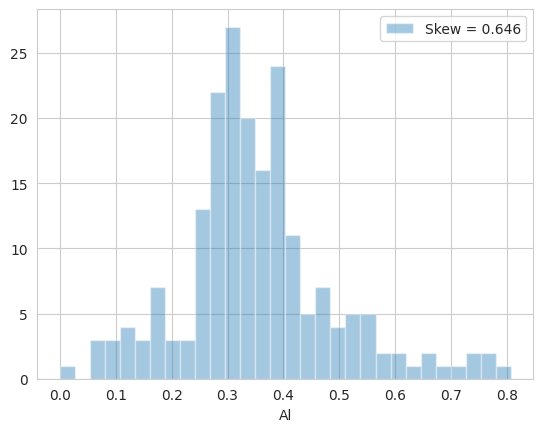

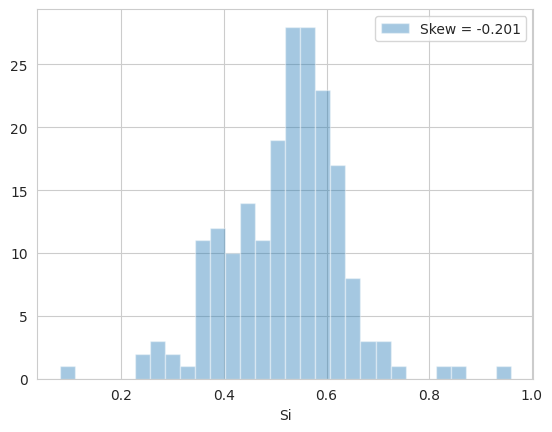

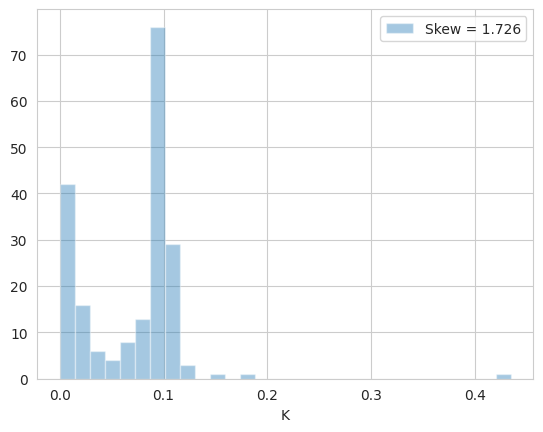

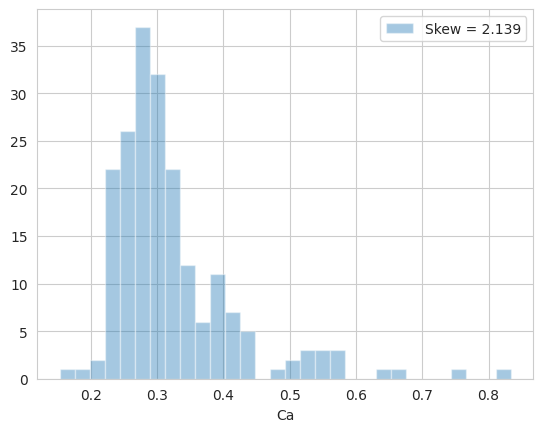

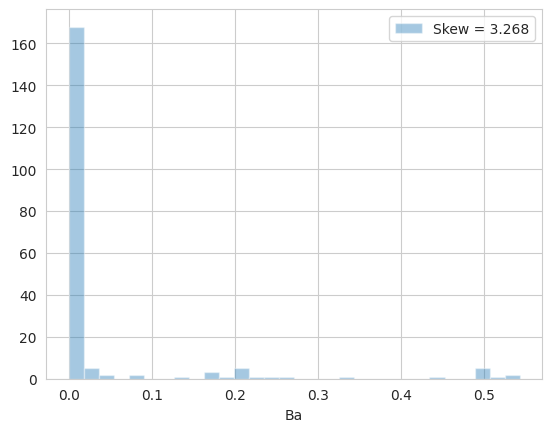

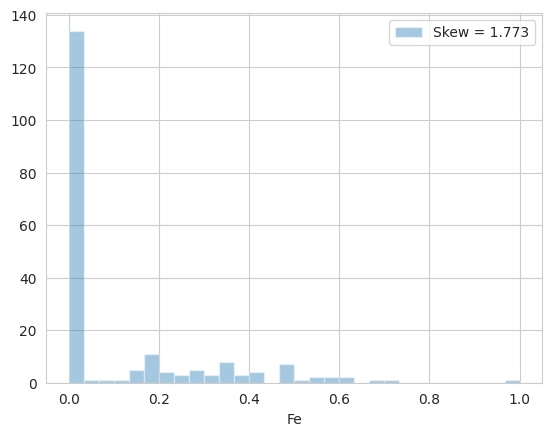

In [ ]:
for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde=False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [ ]:
df['Type'].value_counts()

,count
Type,
1,70
2,70
7,25
3,17
5,10
6,8


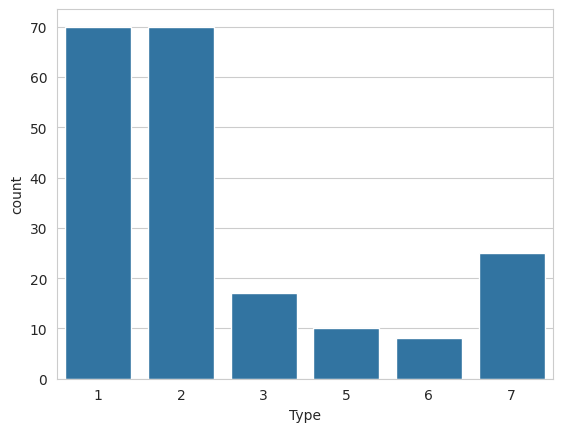

In [ ]:
sns.countplot(x='Type', data=df)
plt.show()

In [ ]:
X = df[features]
y = df['Type']
# set a seed and a test size for splitting the dataset
seed = 7
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size , random_state = seed)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[300,400,500,600,700,800],
              'max_depth':[5,6,7,8,9,10] ,
              'n_jobs':[-1],
              'max_features':[3,4,5]}
grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

In [ ]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10],
                         'max_features': [3, 4, 5],
                         'n_estimators': [300, 400, 500, 600, 700, 800],
                         'n_jobs': [-1]},
             scoring='accuracy')

In [ ]:
best_param= grid_search.best_params_
best_param

{'max_depth': 6, 'max_features': 5, 'n_estimators': 300, 'n_jobs': -1}

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
y_pred= best_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8

In [ ]:
from sklearn.metrics import confusion_matrix

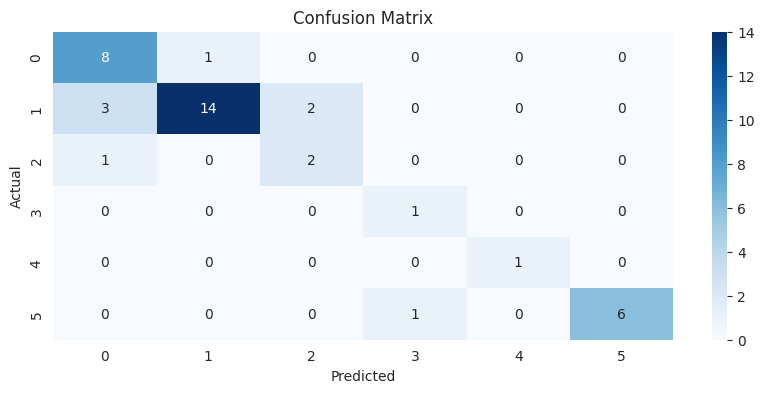

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Precision: 0.7667
Recall: 0.8583
F1 Score: 0.7911


Explain Bagging and Boosting methods. How is it different from each other.

Bagging and boosting are ensemble learning techniques. Bagging (Bootstrap Aggregating) reduces variance by averaging multiple models, while boosting reduces bias by combining weak learners sequentially to form a strong learner.

Explain how to handle imbalance in the data.

Techniques for handling imbalanced data:

Resampling techniques.

Data augmentation.

Synthetic minority over-sampling technique (SMOTE)

Ensemble techniques.

One-class classification.

Cost-sensitive learning.

Evaluation metrics for imbalanced data.